In [88]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab as pyl



In [89]:
#descargamos los datos
df=pd.read_csv('aguaprieta2',skiprows=20,skipfooter=1, sep='\s+',header=None,
               names=['DD/MM/YY','PRECIP','EVAP','TMAX','TMIN'],engine='python')

In [90]:

df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/YY'], 1), dayfirst=True)
df=df.drop(['DD/MM/YY'],1)

In [91]:
df.dtypes


PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHA     datetime64[ns]
dtype: object

In [92]:
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA
0,0.0,NaN,19.5,2.0,1961-02-01
1,0.0,NaN,20.0,2.5,1961-02-02
2,0.0,2.7,21.5,1.8,1961-02-03
3,0.0,3.0,16.7,1.0,1961-02-04
4,0.0,1.3,11.4,4.0,1961-02-05


In [93]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,16733.000000,12277.000000,16446.000000,16435.000000
mean,0.955698,5.679653,26.371555,8.596580
std,4.043399,3.137320,8.018800,7.895741
min,0.000000,0.000000,-3.500000,-19.500000
25%,0.000000,3.100000,20.000000,2.000000
50%,0.000000,5.300000,27.000000,8.000000
75%,0.000000,7.900000,33.000000,16.000000
max,70.000000,17.600000,45.000000,27.000000


In [94]:
df['MES'] = df['FECHA'].dt.month

In [95]:
df['AÑO']=df['FECHA'].dt.year

In [96]:
df.head()


,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
0,0.0,NaN,19.5,2.0,1961-02-01,2,1961
1,0.0,NaN,20.0,2.5,1961-02-02,2,1961
2,0.0,2.7,21.5,1.8,1961-02-03,2,1961
3,0.0,3.0,16.7,1.0,1961-02-04,2,1961
4,0.0,1.3,11.4,4.0,1961-02-05,2,1961


In [97]:
for i in range(1,13):
        PRECIPMENS =  df.loc[df['MES'] == i, 'PRECIP'].mean()
        print('MES',i,np.round(PRECIPMENS,decimals=1),'mm')

MES 1 0.6 mm
MES 2 0.6 mm
MES 3 0.3 mm
MES 4 0.2 mm
MES 5 0.2 mm
MES 6 0.4 mm
MES 7 3.0 mm
MES 8 2.6 mm
MES 9 1.4 mm
MES 10 0.8 mm
MES 11 0.6 mm
MES 12 0.9 mm


In [98]:
PROM_PRECIP=(0.6,0.6,0.3,0.2,0.2,0.4,3,2.6,1.4,0.8,0.6,0.9)

In [99]:
ind = np.arange(len(PROM_PRECIP))  # the x locations for the groups
width = 0.35  # the width of the bars

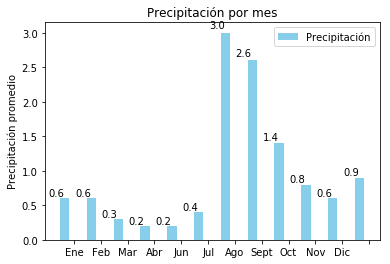

In [100]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, PROM_PRECIP, width,
                color='SkyBlue', label='Precipitación')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precipitación promedio')
ax.set_title('Precipitación por mes')
ax.set_xticks(ind)
ax.set_xticklabels(('Ene', 'Feb', 'Mar', 'Abr', 'Jun','Jul','Ago','Sept','Oct','Nov'
                   ,'Dic'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")


plt.show()

In [101]:
PRECIPSUM=[]
FECHA=[]
for i in range(1961,2012):
        PRECIPAÑO =  df.loc[df['AÑO'] == i, 'PRECIP'].sum()
        PRECIPSUM.append(np.round(PRECIPAÑO,decimals=1))
        FECHA.append(i)
        print('AÑO',i,np.round(PRECIPAÑO,decimals=1),'')
        
        
print(PRECIPSUM)
print(FECHA)

AÑO 1961 314.5 
AÑO 1962 134.0 
AÑO 1963 142.9 
AÑO 1964 323.0 
AÑO 1965 374.0 
AÑO 1966 441.7 
AÑO 1967 473.2 
AÑO 1968 304.8 
AÑO 1969 271.5 
AÑO 1970 211.0 
AÑO 1971 354.0 
AÑO 1972 29.0 
AÑO 1973 10.5 
AÑO 1974 311.8 
AÑO 1975 291.2 
AÑO 1976 283.0 
AÑO 1977 491.0 
AÑO 1978 428.5 
AÑO 1979 306.9 
AÑO 1980 305.0 
AÑO 1981 366.0 
AÑO 1982 366.2 
AÑO 1983 596.8 
AÑO 1984 579.4 
AÑO 1985 457.7 
AÑO 1986 448.9 
AÑO 1987 198.8 
AÑO 1988 472.0 
AÑO 1989 288.2 
AÑO 1990 425.5 
AÑO 1991 448.9 
AÑO 1992 379.4 
AÑO 1993 346.8 
AÑO 1994 412.3 
AÑO 1995 268.0 
AÑO 1996 323.4 
AÑO 1997 297.0 
AÑO 1998 269.4 
AÑO 1999 0.0 
AÑO 2000 155.5 
AÑO 2001 311.6 
AÑO 2002 289.2 
AÑO 2003 187.4 
AÑO 2004 269.0 
AÑO 2005 290.2 
AÑO 2006 345.5 
AÑO 2007 432.8 
AÑO 2008 223.0 
AÑO 2009 194.1 
AÑO 2010 404.7 
AÑO 2011 142.5 
[314.5, 134.0, 142.9, 323.0, 374.0, 441.7, 473.2, 304.8, 271.5, 211.0, 354.0, 29.0, 10.5, 311.8, 291.2, 283.0, 491.0, 428.5, 306.9, 305.0, 366.0, 366.2, 596.8, 579.4, 457.7, 448.9, 198.8, 

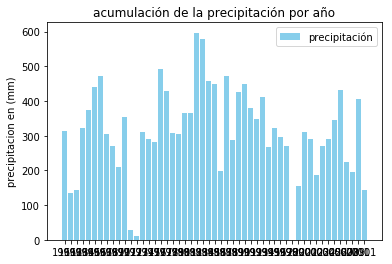

In [102]:
ind=np.arange(len(PRECIPSUM))
width= .035


fig, ax = plt.subplots()
rects1=ax.bar(ind - width/2, PRECIPSUM, color='SkyBlue',label='precipitación')

#agreagamos nombres a los ejes
ax.set_ylabel('precipitacion en (mm)')
ax.set_title('acumulación de la precipitación por año')
ax.set_xticks(ind)
ax.set_xticklabels((FECHA))
                   
ax.legend()
                   
#def autolabel(rects, xpos='center'):

    #xpos = xpos.lower()  # normalize the case of the parameter
    #ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    #offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    #for rect in rects:
      #  height = rect.get_height()
       # ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
        #        '{}'.format(height), ha=ha[xpos], va='bottom')


#autolabel(rects1, "left")
                   
plt.show()

In [103]:
max(ind)

50

In [104]:
#ahora haremos una gráfica de evolución de la temperatura máxima t temperatura mínima
t=np.arange(1961,2013,1)
s=

SyntaxError: invalid syntax (<ipython-input-104-aa64b6f5966a>, line 3)

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_'

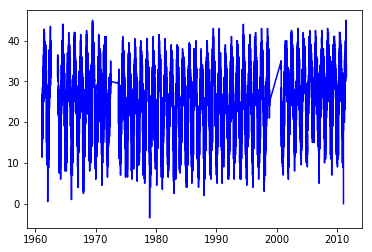

In [106]:
t=np.arange(1961,2013,10)
df1=df[['TMIN','TMAX']]
plt.plot_date(x=df.FECHA, y=df.TMAX, fmt="b-")
plt.plot_
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

In [ ]:
df.head()

<Figure size 432x288 with 0 Axes>

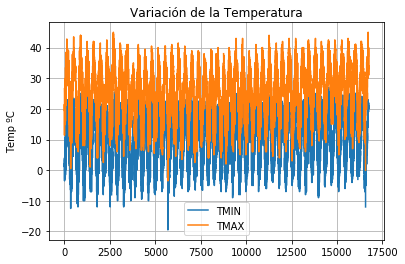

In [108]:
df1 = df[['TMIN','TMAX']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

In [105]:
# Data for plotting


t = np.arange(1961, 2013, 1)
x=df.loc[df['AÑO']==t,'TMIN']
s = x

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='temp',
       title='la wea culia')
ax.grid()

fig.savefig("test.png")
plt.show()

ValueError: Lengths must match to compare

ValueError: x and y must be the same size

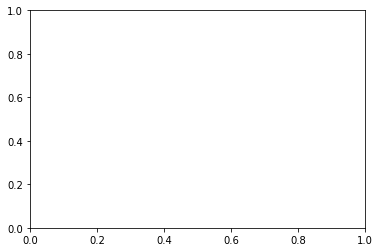

In [110]:
X=np.linspace(0,17500,10)
Y1=df.TMIN
Y2=df.TMAX

plt.scatter(X,Y1,color='k')
plt.scatter(X,Y2,color='g')
plt.show()
